<a href="https://colab.research.google.com/github/baumanab/device_failure/blob/master/telem_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import tqdm
import seaborn as sns
import altair as alt

import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
telem_raw = pd.read_csv('drive/My Drive/telem/device_failure.csv', encoding= 'utf8')

In [0]:
telem_raw.date = telem_raw.date.astype(str)
date_index = pd.to_datetime(telem_raw['date'], format='%y%j')
telem_raw = telem_raw.set_index(date_index)

telem_raw['day_of_year'] = telem_raw.date.str.slice(start=2)
telem_raw['day_of_year'] = telem_raw.day_of_year.astype('int')

cols = telem_raw.columns.to_list()
cols.insert(1, 'day_of_year')
telem_raw = telem_raw[cols[:-1]]


display(telem_raw.head())

,date,day_of_year,device,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9,failure
date,,,,,,,,,,,,,
2015-01-01,15001,1,S1F01085,215630672,56,0,52,6,407438,0,0,7,0
2015-01-01,15001,1,S1F0166B,61370680,0,3,0,6,403174,0,0,0,0
2015-01-01,15001,1,S1F01E6Y,173295968,0,0,0,12,237394,0,0,0,0
2015-01-01,15001,1,S1F01JE0,79694024,0,0,0,6,410186,0,0,0,0
2015-01-01,15001,1,S1F01R2B,135970480,0,0,0,15,313173,0,0,3,0


In [0]:
telem_raw.describe()

,day_of_year,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9,failure
count,124494.000000,1.244940e+05,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000
mean,106.222798,1.223868e+08,159.484762,9.940455,1.741120,14.222693,260172.858025,0.292528,0.292528,12.451524,0.000851
std,78.412061,7.045960e+07,2179.657730,185.747321,22.908507,15.943021,99151.009852,7.436924,7.436924,191.425623,0.029167
min,1.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,6.127675e+07,0.000000,0.000000,0.000000,8.000000,221452.000000,0.000000,0.000000,0.000000,0.000000
50%,86.000000,1.227957e+08,0.000000,0.000000,0.000000,10.000000,249799.500000,0.000000,0.000000,0.000000,0.000000
75%,168.000000,1.833084e+08,0.000000,0.000000,0.000000,12.000000,310266.000000,0.000000,0.000000,0.000000,0.000000
max,306.000000,2.441405e+08,64968.000000,24929.000000,1666.000000,98.000000,689161.000000,832.000000,832.000000,18701.000000,1.000000


In [0]:
telem_raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 124494 entries, 2015-01-01 to 2015-11-02
Data columns (total 13 columns):
date           124494 non-null object
day_of_year    124494 non-null int64
device         124494 non-null object
attribute1     124494 non-null int64
attribute2     124494 non-null int64
attribute3     124494 non-null int64
attribute4     124494 non-null int64
attribute5     124494 non-null int64
attribute6     124494 non-null int64
attribute7     124494 non-null int64
attribute8     124494 non-null int64
attribute9     124494 non-null int64
failure        124494 non-null int64
dtypes: int64(11), object(2)
memory usage: 15.8+ MB


In [0]:
# unique devices
display(len(set(telem_raw.device)))

# observations per device
display(telem_raw.groupby('device').count().date.min())
display(telem_raw.groupby('device').count().date.max())
display(telem_raw.groupby('device').count().date.mean())
display(telem_raw.groupby('device').count().date.median())

1168

3

304

106.58732876712328

84.0

In [0]:
num_days_hist = alt.Chart(telem_raw.groupby('device').count()).mark_bar().encode(
    alt.X("day_of_year", bin=alt.Bin(maxbins=30), title= 'days_since_launch'),
    y='count()',)

num_days_hist

Chart({
  data:           date  day_of_year  attribute1  ...  attribute8  attribute9  failure
  device                                   ...                                 
  S1F01085     6            6           6  ...           6           6        6
  S1F013BB     6            6           6  ...           6           6        6
  S1F0166B     6            6           6  ...           6           6        6
  S1F01E6Y    48           48          48  ...          48          48       48
  S1F01JE0     6            6           6  ...           6           6        6
  S1F01R2B   223          223         223  ...         223         223      223
  S1F01TD5     6            6           6  ...           6           6        6
  S1F01XDJ   106          106         106  ...         106         106      106
  S1F023H2    19           19          19  ...          19          19       19
  S1F02A0J   227          227         227  ...         227         227      227
  S1F02DZ2     6            6           6  ...           6           6        6
  S1F02EVN     6            6           6  ...           6           6        6
  S1F02L38    86           86          86  ...          86          86       86
  S1F02MGA     6            6           6  ...           6           6        6
  S1F02P76     6            6           6  ...           6           6        6
  S1F02VAX     6            6           6  ...           6           6        6
  S1F02W1L     6            6           6  ...           6           6        6
  S1F02WFT     6            6           6  ...           6           6        6
  S1F02XLX     6            6           6  ...           6           6        6
  S1F0318A     6            6           6  ...           6           6        6
  S1F0322R     6            6           6  ...           6           6        6
  S1F0330P     6            6           6  ...           6           6        6
  S1F03499     6            6           6  ...           6           6        6
  S1F035SJ     6            6           6  ...           6           6        6
  S1F0377V     6            6           6  ...           6           6        6
  S1F039FE     6            6           6  ...           6           6        6
  S1F03RV3     5            5           5  ...           5           5        5
  S1F03YZM   215          215         215  ...         215         215      215
  S1F044ET   236          236         236  ...         236         236      236
  S1F049RX     6            6           6  ...           6           6        6
  ...        ...          ...         ...  ...         ...         ...      ...
  Z1F1A0LM   295          295         295  ...         295         295      295
  Z1F1A0RP   295          295         295  ...         295         295      295
  Z1F1A1HH   295          295         295  ...         295         295      295
  Z1F1A7MG     6            6           6  ...           6           6        6
  Z1F1A83K   112          112         112  ...         112         112      112
  Z1F1AD0M    82           82          82  ...          82          82       82
  Z1F1AF54     6            6           6  ...           6           6        6
  Z1F1AFF2    84           84          84  ...          84          84       84
  Z1F1AFT5     6            6           6  ...           6           6        6
  Z1F1AG5N     9            9           9  ...           9           9        9
  Z1F1AGLA     5            5           5  ...           5           5        5
  Z1F1AGN5     5            5           5  ...           5           5        5
  Z1F1AGW1     5            5           5  ...           5           5        5
  Z1F1B6H4     6            6           6  ...           6           6        6
  Z1F1B6NP   292          292         292  ...         292         292      292
  Z1F1B799   245          245         245  ...         245         245      245
  Z1F1CZ35   103          103         103  ...         103        

In [0]:
# number of devices from each label
telem_raw.failure.value_counts()

0    124388
1       106
Name: failure, dtype: int64

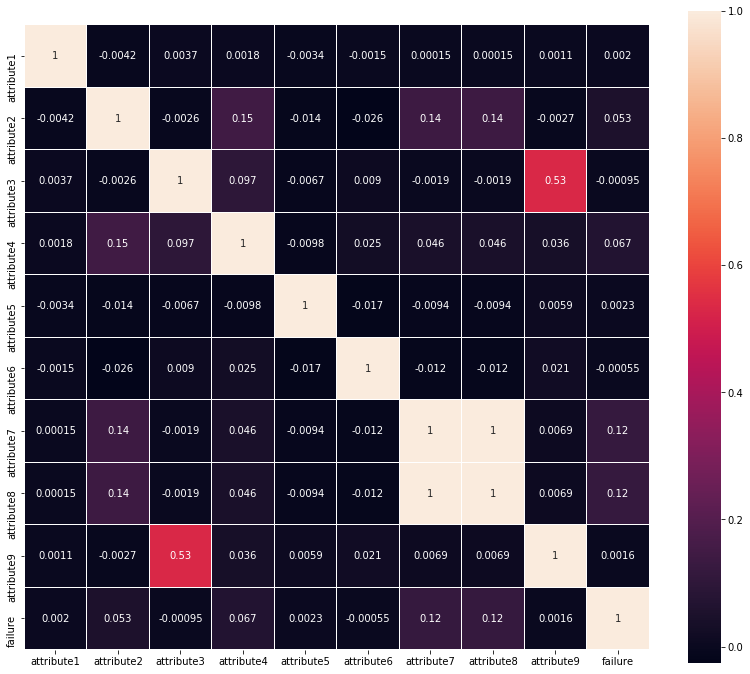

In [0]:
attribtue_cols = [item for item in telem_raw.columns.to_list() if 'att' in item]
attribtue_cols.append('failure')
feature_df = telem_raw[attribtue_cols]
feature_df = feature_df[attribtue_cols]

correlations = pd.DataFrame(feature_df.corr())
correlations


plt.figure(figsize=(14,12))
sns.heatmap(correlations.astype(float),linewidths=0.1, 
            square=True,  linecolor='white', annot=True)
plt.show()

In [0]:
feature_df.var()

attribute1    4.964555e+15
attribute2    4.750908e+06
attribute3    3.450207e+04
attribute4    5.247997e+02
attribute5    2.541799e+02
attribute6    9.830923e+09
attribute7    5.530784e+01
attribute8    5.530784e+01
attribute9    3.664377e+04
failure       8.507285e-04
dtype: float64

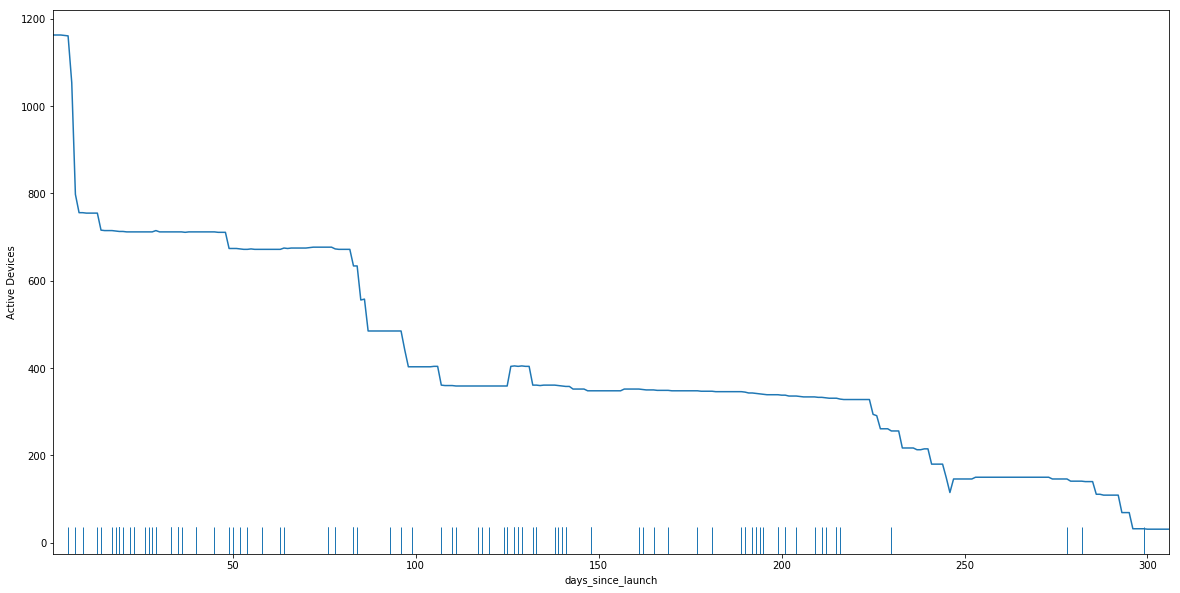

In [0]:
fail_group = telem_raw[telem_raw.failure == 1]

# device count over series with rug plot of failures

ax = telem_raw.groupby('day_of_year')['device'].nunique().plot(figsize=(20,10))
ax.set_xlabel('days_since_launch')
ax.set_ylabel('Active Devices')
sns.rugplot(fail_group.day_of_year)

In [0]:
fail_sum = fail_group.groupby('day_of_year').sum().reset_index()

fail_plot = alt.Chart(fail_sum).mark_bar().encode(
    alt.X("day_of_year", bin=alt.Bin(maxbins=50), title= 'days_since_launch'),
    y='failure',
)

fail_plot

Chart({
  data:     day_of_year  attribute1  attribute2  ...  attribute8  attribute9  failure
  0             5    48467332       64776  ...          56           1        1
  1             7   184069720         528  ...          32           3        1
  2             9   136429411       64784  ...           8           0        1
  3            13   188251248        2040  ...          32           1        1
  4            14   220461296           0  ...           0           0        1
  5            17   154998752        1312  ...           0           0        1
  6            18    54292264       64736  ...           0           2        1
  7            19  1087736088        5016  ...         136          55        8
  8            20   178102642       10288  ...         424           1        1
  9            22    22646880           0  ...           0           0        1
  10           23   257274120           0  ...          48           0        2
  11           26    47001646           0  ...           0           0        1
  12           27   166313728           0  ...         744        1080        1
  13           28   229400712           0  ...           8           2        1
  14           29   169193432        1080  ...           0           0        2
  15           33   247158754       22776  ...         216           3        2
  16           35   393101352        1320  ...          24           5        3
  17           36   101296400           0  ...           0           2        1
  18           40   388447064         736  ...           8           0        2
  19           45    97170872        2576  ...           0           0        1
  20           49   194314640           0  ...           0           1        1
  21           50    37422416         976  ...          48           0        1
  22           52    15667184           0  ...           0           0        1
  23           54   212770360           8  ...           0           0        1
  24           58   150363440         712  ...           0           0        1
  25           63   147855008          16  ...           0           0        1
  26           64   171736696        2464  ...           0           0        1
  27           76   116615288        2144  ...          40           0        2
  28           78   232225968        2104  ...           8          19        2
  29           83    46006408         920  ...           8           0        2
  ..          ...         ...         ...  ...         ...         ...      ...
  46          133   331142544           0  ...           0           0        2
  47          138    80616240       27856  ...           0           5        1
  48          139   150373945           0  ...          16           0        1
  49          140   355426080       10200  ...           0           7        2
  50          141   243297576           0  ...          16          41        2
  51          148   376128960        2496  ...           0           1        2
  52          161    34532320           0  ...           0           0        1
  53          162    87366992           0  ...           0           7        1
  54          165   203568368           0  ...           0        1165        1
  55          169    87115256           0  ...           0           0        1
  56          177   149049520           0  ...           0          19        1
  57          181   178051496           0  ...           0           0        1
  58          189    93368288        1176  ...           0           2        1
  59          190   307232256         160  ...           8           0        2
  60          192   198736232           0  ...           0           0        1
  61          193   246539936           0  ...           0           0        2
  62          194   200596156          88  ...          56           0        1
  63          195   230884776        9264  ...           0        

In [0]:
var_cols = [item for item in feature_df.columns.to_list() if item[-1] in list('12345679')]

In [0]:
telem_melt = pd.melt(telem_raw, id_vars= ['failure', 'day_of_year'], value_vars= var_cols, var_name= 'attributes')
telem_melt.head()

,failure,day_of_year,attributes,value
0,0,1,attribute1,215630672
1,0,1,attribute1,61370680
2,0,1,attribute1,173295968
3,0,1,attribute1,79694024
4,0,1,attribute1,135970480


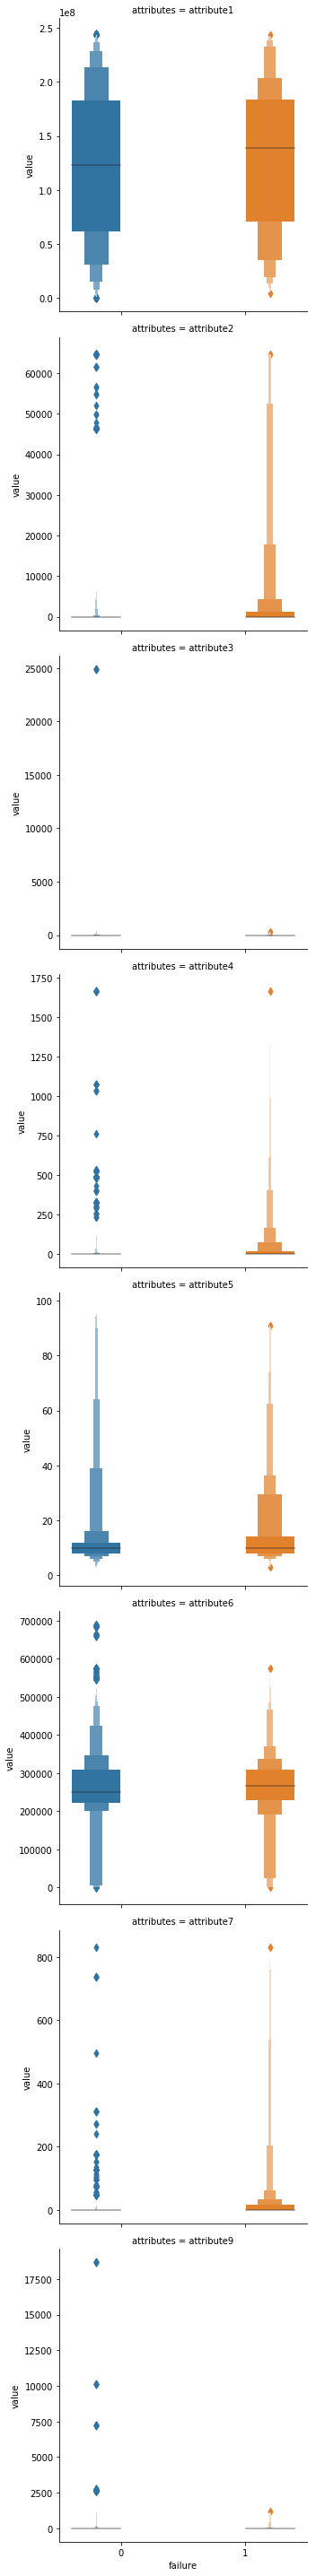

In [0]:
g= sns.catplot(x='failure', y='value', hue='failure',
            row='attributes',data=telem_melt, kind='boxen',
            height=5, aspect=1, sharey=False) 

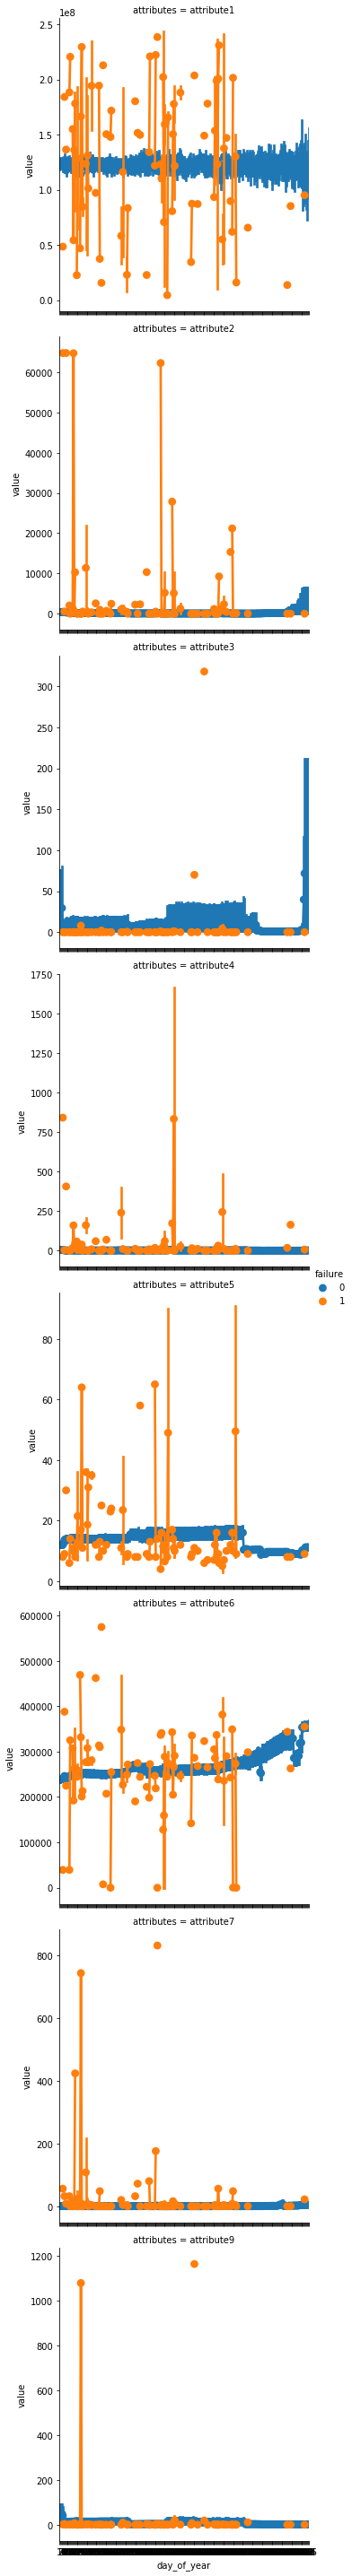

In [0]:
g= sns.catplot(x='day_of_year', y='value', hue='failure',
            row='attributes',data=telem_melt, kind='point',
            height=5, aspect=1, sharey=False) 

In [0]:
failed_device_data = telem_raw[telem_raw.device.isin(fail_group.device)]

devs_gteq_100days = failed_device_data[failed_device_data.day_of_year >= 100].device
devs_gt50lt100days = failed_device_data[(failed_device_data.day_of_year >=50) & (failed_device_data.day_of_year < 100)].device
devs_lt50days = failed_device_data[(failed_device_data.day_of_year <50)].device
fdd100 = failed_device_data[failed_device_data.device.isin(devs_gteq_100days)]
fdd50_100 = failed_device_data[failed_device_data.device.isin(devs_gt50lt100days)]
fdd50 = failed_device_data[failed_device_data.device.isin(devs_lt50days)]

fdd100_melt = pd.melt(fdd100, id_vars= ['failure', 'date', 'device'], value_vars= var_cols, var_name= 'attributes')
fdd50_100_melt = pd.melt(fdd50_100, id_vars= ['failure', 'date', 'device'], value_vars= var_cols, var_name= 'attributes')
fdd50_melt = pd.melt(fdd50, id_vars= ['failure', 'date', 'device'], value_vars= var_cols, var_name= 'attributes')


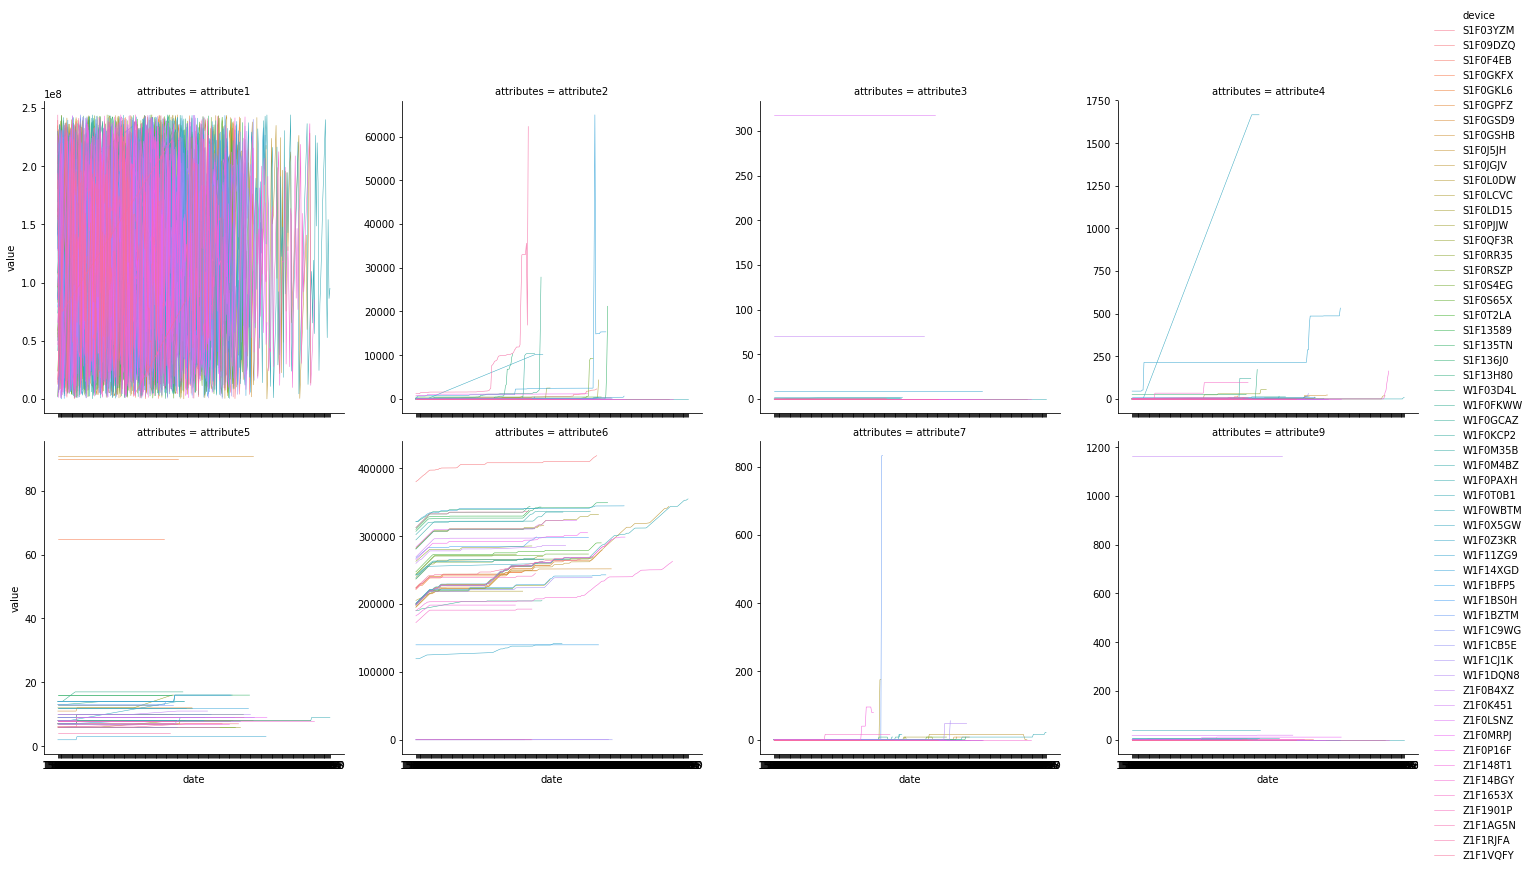

In [0]:
g = sns.FacetGrid(fdd100_melt, col='attributes', hue='device', height=5, aspect=1, sharey=False, col_wrap=4)
g = (g.map(sns.lineplot, 'date', 'value', linewidth= 0.5)
     .add_legend())

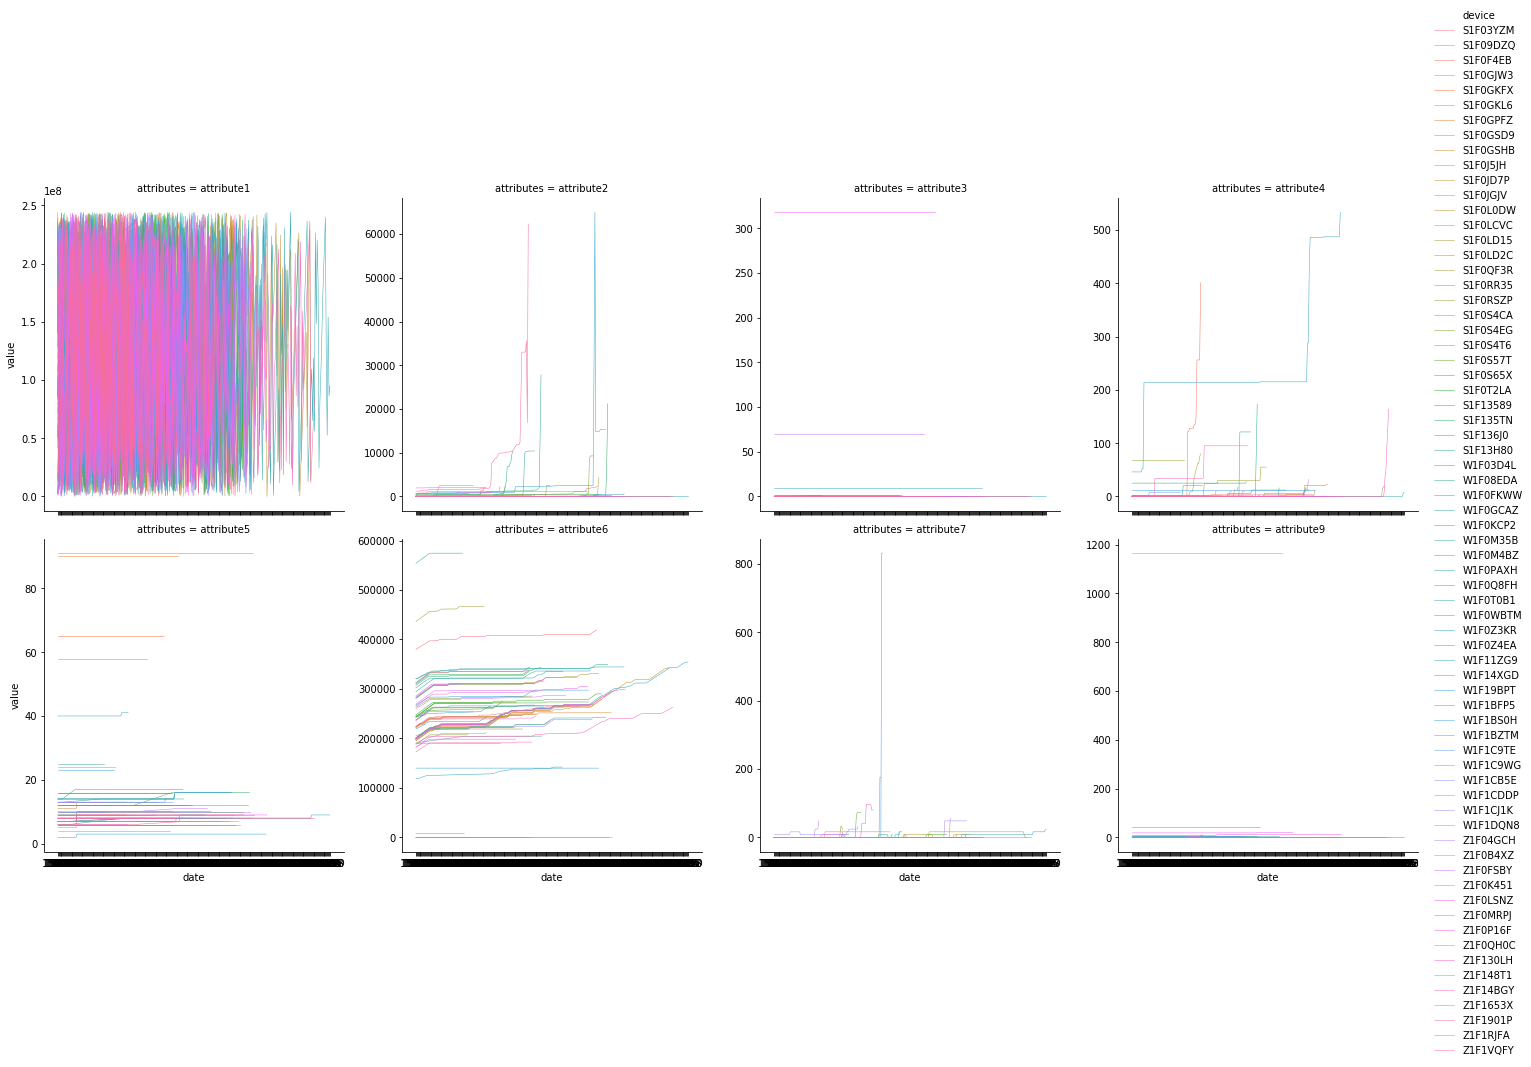

In [0]:
g = sns.FacetGrid(fdd50_100_melt, col='attributes', hue='device', height=5, aspect=1, sharey=False, col_wrap=4)
g = (g.map(sns.lineplot, 'date', 'value', linewidth= 0.5)
     .add_legend())

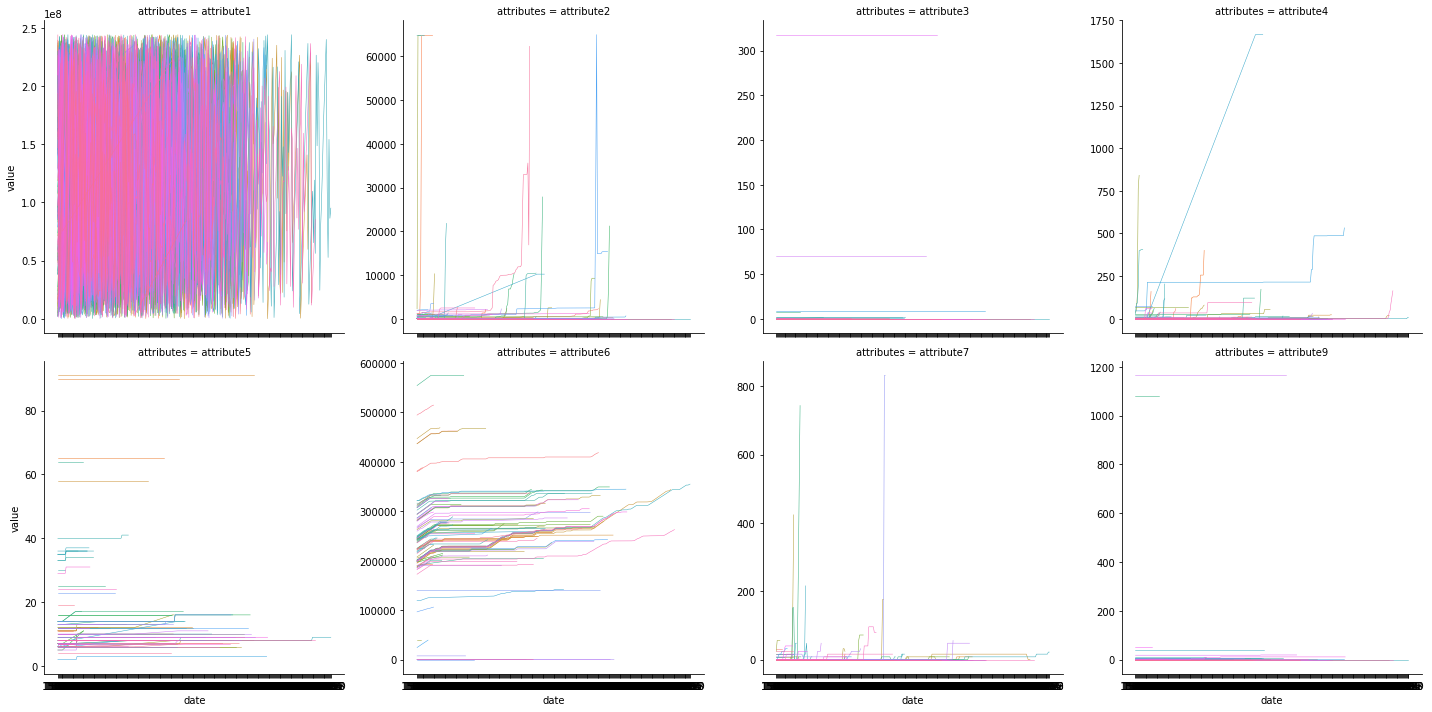

In [0]:
g = sns.FacetGrid(fdd50_melt, col='attributes', hue='device', height=5, aspect=1, sharey=False, col_wrap=4)
g = (g.map(sns.lineplot, 'date', 'value', linewidth= 0.5))

In [0]:
succ_group = telem_raw[~telem_raw.device.isin(fail_group.device)]

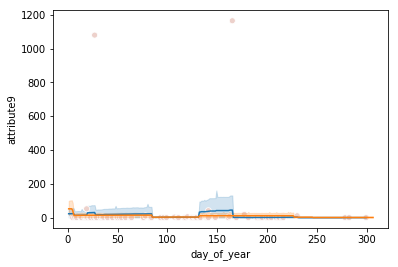

In [0]:
g = sns.lineplot('day_of_year', 'attribute9', data= failed_device_data)
sns.scatterplot(x='day_of_year', y='attribute9', data=fail_group, hue='failure', legend=False)
sns.lineplot('day_of_year', 'attribute9', data= succ_group)

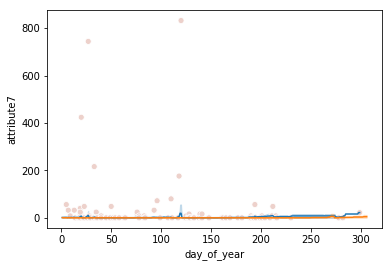

In [0]:
g = sns.lineplot('day_of_year', 'attribute7', data= failed_device_data)
sns.scatterplot(x='day_of_year', y='attribute7', data=fail_group, hue='failure', legend=False)
sns.lineplot('day_of_year', 'attribute7', data= succ_group)

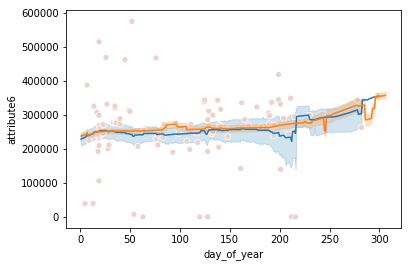

In [0]:
g = sns.lineplot('day_of_year', 'attribute6', data= failed_device_data)
sns.scatterplot(x='day_of_year', y='attribute6', data=fail_group, hue='failure', legend=False)
sns.lineplot('day_of_year', 'attribute6', data= succ_group)



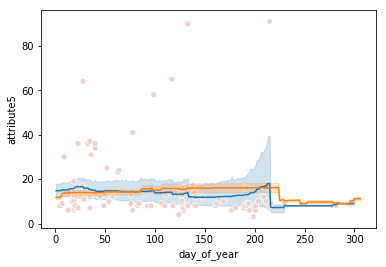

In [0]:
g = sns.lineplot('day_of_year', 'attribute5', data= failed_device_data)
sns.scatterplot(x='day_of_year', y='attribute5', data=fail_group, hue='failure', legend=False)
sns.lineplot('day_of_year', 'attribute5', data= succ_group)

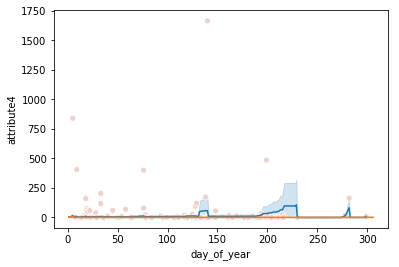

In [0]:
g = sns.lineplot('day_of_year', 'attribute4', data= failed_device_data)
sns.scatterplot(x='day_of_year', y='attribute4', data=fail_group, hue='failure', legend=False)
sns.lineplot('day_of_year', 'attribute4', data= succ_group)

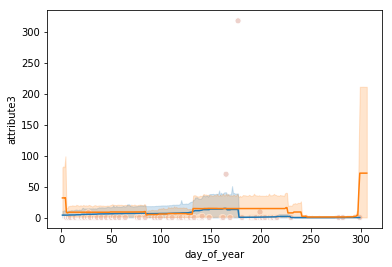

In [0]:
g = sns.lineplot('day_of_year', 'attribute3', data= failed_device_data)
sns.scatterplot(x='day_of_year', y='attribute3', data=fail_group, hue='failure', legend=False)
sns.lineplot('day_of_year', 'attribute3', data= succ_group)

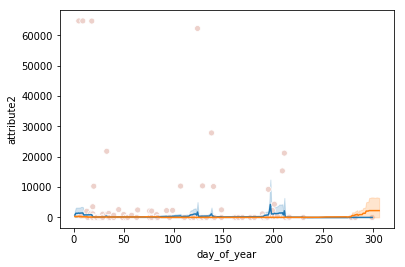

In [0]:
g = sns.lineplot('day_of_year', 'attribute2', data= failed_device_data)
sns.scatterplot(x='day_of_year', y='attribute2', data=fail_group, hue='failure', legend=False)
sns.lineplot('day_of_year', 'attribute2', data= succ_group)

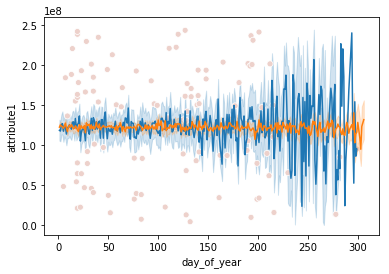

In [0]:
g = sns.lineplot('day_of_year', 'attribute1', data= failed_device_data)
sns.scatterplot(x='day_of_year', y='attribute1', data=fail_group, hue='failure', legend=False)
sns.lineplot('day_of_year', 'attribute1', data= succ_group)

In [0]:
telem_raw['dev_fate'] = telem_raw.device.where(telem_raw.device.isin(fail_group.device), other= "succ")
telem_raw['dev_fate'] = telem_raw.dev_fate.where(telem_raw.device.isin(succ_group.device), other= "fails")


In [0]:
telem_melt = pd.melt(telem_raw, id_vars= ['failure', 'day_of_year', 'dev_fate'], value_vars= var_cols, var_name= 'attributes')
telem_melt.head()

,failure,day_of_year,dev_fate,attributes,value
0,0,1,succ,attribute1,215630672
1,0,1,succ,attribute1,61370680
2,0,1,succ,attribute1,173295968
3,0,1,succ,attribute1,79694024
4,0,1,succ,attribute1,135970480


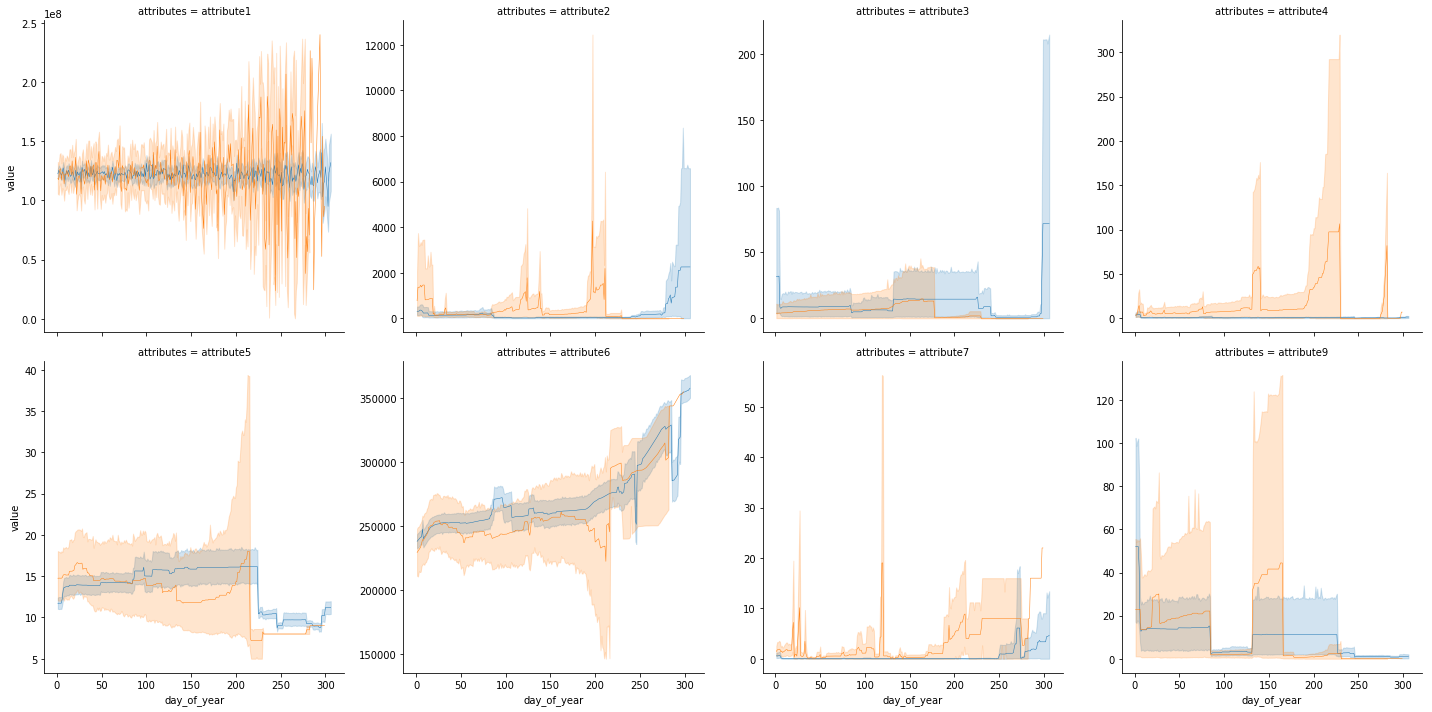

In [0]:
g = sns.FacetGrid(telem_melt, col='attributes', hue='dev_fate', height=5, aspect=1, sharey=False, col_wrap=4)
g = (g.map(sns.lineplot, 'day_of_year', 'value', linewidth= 0.5))

## Next Steps

- develop understanding of changes in signal as we approach failure point (do signals change as they get closer to failure)
- break data up into time windows (lag of 3-6 steps) and label these windows as failed or success.  This will allow us to do a few things:
  + inspect the windows themselves for insight
  + create a data set comprised of success and fail windows, allowing control of the proportion of each type
  + create a data set where success and fail sequences are taken from the same base sequence, this can serve as an internal control
 - reshape the data as a supervised model where the label is predicted from the sequence.  Start with a univariate to work through steps and then move onto multivariate and feature extraction (window mean, max, diff from start to end of sequence, etc.)
 - split into test/train, maintaining label proportions (stratified shuffle split)
 - normalize/standardize data as appropriate to subsequent model type applied to sequence
 - train model probably use cv (obj metrics precision, recall, AUC) with a predetermined cutoff (not clear from a business perespective whether we should emphasize precision or recall, it depends on the cost of maintenance vs. the cost of repair/replacement)
 - evaluate model on test set 
 

In [0]:
fail_day_dict = dict(fail_group[['device', 'day_of_year']].values)

In [0]:
def get_fail_day(device, mapping):
  
  """
  Accepts a device id (string) and a map of device id to fail day (dict)
  returning the day of failure (int)
  """
  
  return mapping.get(device, 1000)

In [0]:
telem_raw['fail_day'] = telem_raw.device.apply(lambda x: get_fail_day(x, fail_day_dict))

In [0]:
telem_raw['days_until_failure'] = telem_raw.fail_day - telem_raw.day_of_year - 1

In [0]:
failed = telem_raw[telem_raw.dev_fate == 'fails']

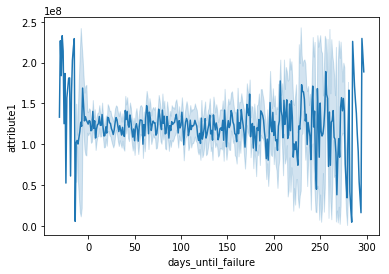

In [0]:
sns.lineplot('days_until_failure', 'attribute1', data= failed)

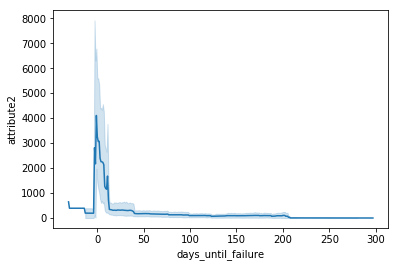

In [0]:
sns.lineplot('days_until_failure', 'attribute2', data= failed)

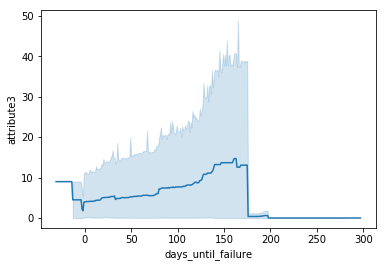

In [0]:
sns.lineplot('days_until_failure', 'attribute3', data= failed)

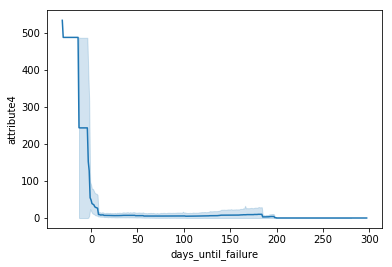

In [0]:
sns.lineplot('days_until_failure', 'attribute4', data= failed)

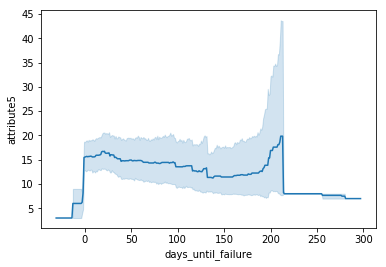

In [0]:
sns.lineplot('days_until_failure', 'attribute5', data= failed)

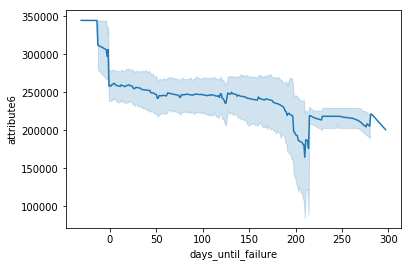

In [0]:
sns.lineplot('days_until_failure', 'attribute6', data= failed)

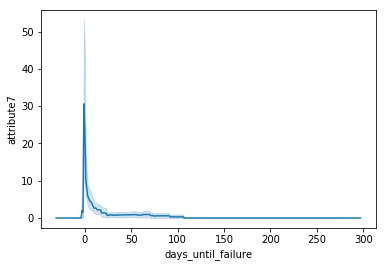

In [0]:
sns.lineplot('days_until_failure', 'attribute7', data= failed)

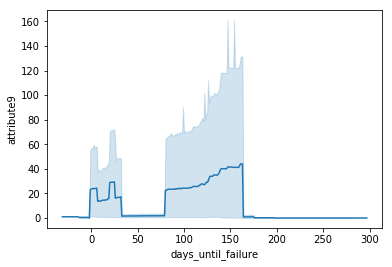

In [0]:
sns.lineplot('days_until_failure', 'attribute9', data= failed)